In [1]:
import random
import matplotlib.pyplot as plt
import time

from cuckoo import CuckooFilter

In [2]:
results = {}

num_buckets = [2**n for n in range(10, 21)]
bucket_size = [2, 4]
possible_buckets = [2, 4, 8]
random.seed(0)

In [3]:
for n in num_buckets:
    for b in bucket_size:
        for p in possible_buckets:
            print(f"Testing {n} buckets, {b} bucket size, {p} possible buckets")
            cf = CuckooFilter(n, b, p)
            # start = time.time()
            for i in range(n * b):
                try:
                    cf.insert(i)
                except Exception as e:
                    # print(f"Failed to insert {i}: {e}")
                    # print("Time taken:", time.time() - start)
                    break
            lf = cf.load_factor()
            results[(n, b, p)] = lf
            print(f"Load factor: {lf}")

Testing 1024 buckets, 2 bucket size, 2 possible buckets
Load factor: 0.30712890625
Testing 1024 buckets, 2 bucket size, 4 possible buckets
Load factor: 0.712890625
Testing 1024 buckets, 2 bucket size, 8 possible buckets
Load factor: 0.85009765625
Testing 1024 buckets, 4 bucket size, 2 possible buckets
Load factor: 0.72216796875
Testing 1024 buckets, 4 bucket size, 4 possible buckets
Load factor: 0.84326171875
Testing 1024 buckets, 4 bucket size, 8 possible buckets
Load factor: 0.961669921875
Testing 2048 buckets, 2 bucket size, 2 possible buckets
Load factor: 0.40234375
Testing 2048 buckets, 2 bucket size, 4 possible buckets
Load factor: 0.68310546875
Testing 2048 buckets, 2 bucket size, 8 possible buckets
Load factor: 0.829833984375
Testing 2048 buckets, 4 bucket size, 2 possible buckets
Load factor: 0.6146240234375
Testing 2048 buckets, 4 bucket size, 4 possible buckets
Load factor: 0.8387451171875
Testing 2048 buckets, 4 bucket size, 8 possible buckets
Load factor: 0.937255859375
Te

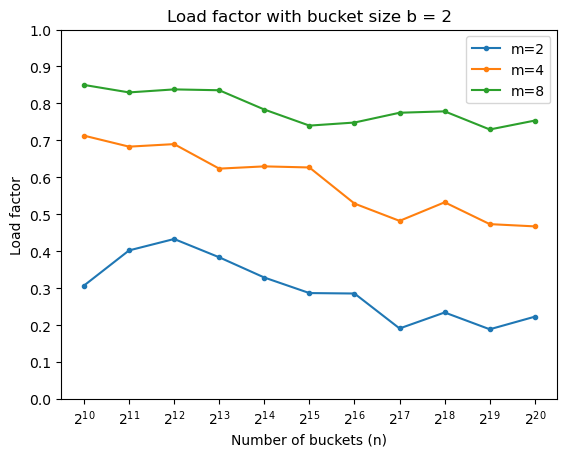

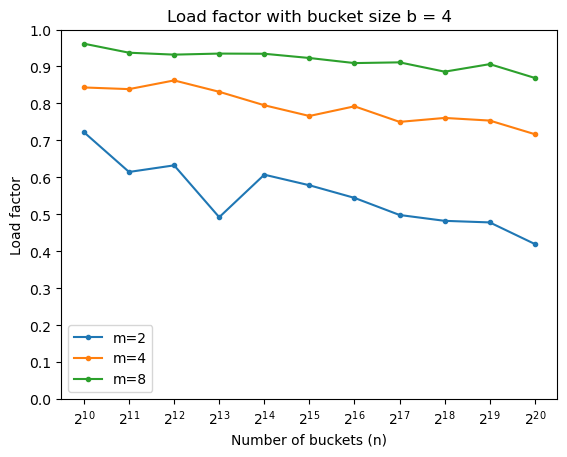

In [4]:
for b in bucket_size:
    for p in possible_buckets:
        x = [n for n in num_buckets]
        y = [results[(n, b, p)] for n in num_buckets]
        plt.plot(x, y, '.-', label=f"m={p}")
    
    plt.title('Load factor with bucket size b = ' + str(b))
    plt.xlabel('Number of buckets (n)')
    plt.ylabel('Load factor')

    # set x-axis ticks to power of 2
    plt.xscale('log', base=2)
    plt.xticks([2**i for i in range(10, 21)])
    plt.ylim(0, 1)
    plt.yticks([i/10 for i in range(11)])
    plt.legend()
    plt.show()


In [5]:
results_5000 = {}

In [6]:
for n in num_buckets:
    for b in bucket_size:
        for p in possible_buckets:
            print(f"Testing {n} buckets, {b} bucket size, {p} possible buckets")
            cf = CuckooFilter(n, b, p, max_kicks=5000)
            # start = time.time()
            for i in range(n * b):
                try:
                    cf.insert(i)
                except Exception as e:
                    # print(f"Failed to insert {i}: {e}")
                    # print("Time taken:", time.time() - start)
                    break
            lf = cf.load_factor()
            results_5000[(n, b, p)] = lf
            print(f"Load factor: {lf}")

Testing 1024 buckets, 2 bucket size, 2 possible buckets
Load factor: 0.30712890625
Testing 1024 buckets, 2 bucket size, 4 possible buckets
Load factor: 0.712890625
Testing 1024 buckets, 2 bucket size, 8 possible buckets
Load factor: 0.85009765625
Testing 1024 buckets, 4 bucket size, 2 possible buckets
Load factor: 0.72216796875
Testing 1024 buckets, 4 bucket size, 4 possible buckets
Load factor: 0.84326171875
Testing 1024 buckets, 4 bucket size, 8 possible buckets
Load factor: 0.961669921875
Testing 2048 buckets, 2 bucket size, 2 possible buckets
Load factor: 0.40234375
Testing 2048 buckets, 2 bucket size, 4 possible buckets
Load factor: 0.68310546875
Testing 2048 buckets, 2 bucket size, 8 possible buckets
Load factor: 0.829833984375
Testing 2048 buckets, 4 bucket size, 2 possible buckets
Load factor: 0.6146240234375
Testing 2048 buckets, 4 bucket size, 4 possible buckets
Load factor: 0.8387451171875
Testing 2048 buckets, 4 bucket size, 8 possible buckets
Load factor: 0.937255859375
Te

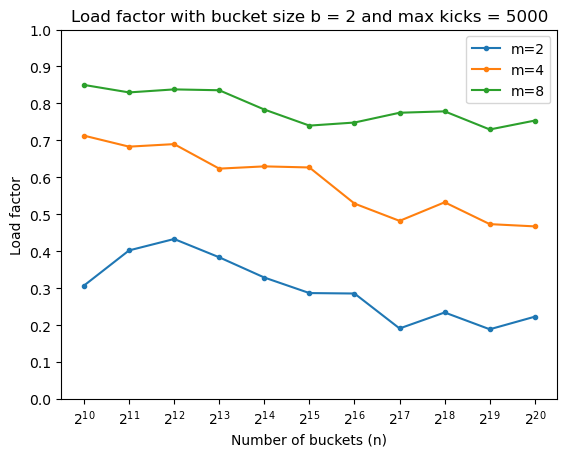

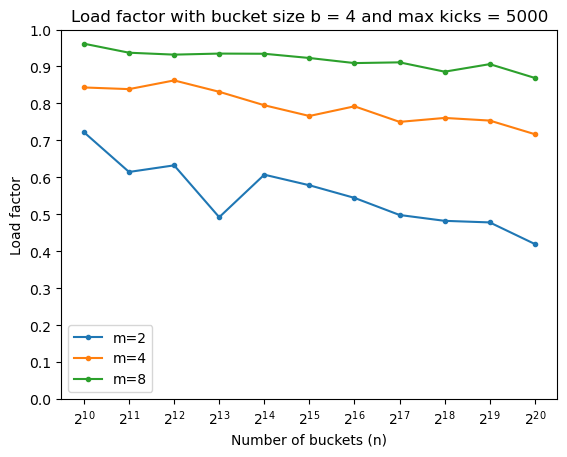

In [7]:
for b in bucket_size:
    for p in possible_buckets:
        x = [n for n in num_buckets]
        y = [results_5000[(n, b, p)] for n in num_buckets]
        plt.plot(x, y, '.-', label=f"m={p}")
    
    plt.title('Load factor with bucket size b = ' + str(b) + ' and max kicks = 5000')
    plt.xlabel('Number of buckets (n)')
    plt.ylabel('Load factor')

    # set x-axis ticks to power of 2
    plt.xscale('log', base=2)
    plt.xticks([2**i for i in range(10, 21)])
    plt.ylim(0, 1)
    plt.yticks([i/10 for i in range(11)])
    plt.legend()
    plt.show()